In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("spam.csv", encoding='utf-8',encoding_errors='replace')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2021,ham,"I don't have anybody's number, I still haven't...",NaN,NaN,NaN
4396,ham,When did dad get back.,NaN,NaN,NaN
3489,ham,Huh but i got lesson at 4 lei n i was thinkin ...,NaN,NaN,NaN
695,ham,Good. Good job. I like entrepreneurs,NaN,NaN,NaN
5323,ham,Aah bless! How's your arm?,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

## Data Cleaning

* first we drop unnecessary column

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


* We can see that there are too many null values in the Unnamed column, so we should drop that column.

In [8]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [9]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],inplace=True)

In [10]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


#### Rename column

In [11]:
df.rename(columns={"v1": "target", "v2": "text"}, inplace=True)

#### checking missing value

In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

#### apply label encoder on target column

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
label_enc = LabelEncoder()

In [15]:
df["target"] = label_enc.fit_transform(df.target)

In [16]:
df.sample(5)

,target,text
4278,1,URGENT. Important information for 02 user. Tod...
2969,0,U should make a fb list
2316,0,That's cause your old. I live to be high.
3624,0,I want to tel u one thing u should not mistake...
3087,0,"'Wnevr i wana fal in luv vth my books, My bed ..."


#### Check for duplicated values and remove them.

In [17]:
df.duplicated().sum()

403

In [18]:
df.shape

(5572, 2)

In [19]:
df.drop_duplicates(keep='first',inplace=True)

In [20]:
df.shape

(5169, 2)

## EDA

<Axes: xlabel='target', ylabel='count'>

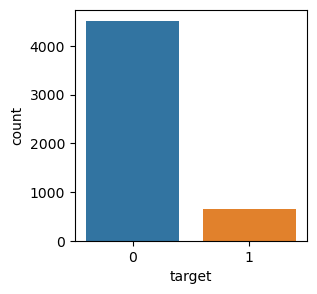

In [21]:
plt.figure(figsize=(3,3))
sns.countplot(data=df, x='target' )

* We can clearly see that the data is imbalanced.

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veerp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df["num_characters"] = df.text.apply(len)

In [25]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
df["num_words"] = df["text"].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
df["num_sentences"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df.drop(columns=["target"],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,5169.0,78.923776,58.174846,2.0,36.0,60.0,117.0,910.0
num_words,5169.0,18.456761,13.325633,1.0,9.0,15.0,26.0,220.0
num_sentences,5169.0,1.966531,1.449833,1.0,1.0,1.0,2.0,38.0


In [31]:
df[df["target"] == 0].drop(columns=['target'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,4516.0,70.456820,56.356802,2.0,34.0,52.0,90.0,910.0
num_words,4516.0,17.123782,13.493970,1.0,8.0,13.0,22.0,220.0
num_sentences,4516.0,1.820195,1.383657,1.0,1.0,1.0,2.0,38.0


In [32]:
df[df["target"] == 1].drop(columns=['target'],axis=1).describe().T

,count,mean,std,min,25%,50%,75%,max
num_characters,653.0,137.479326,30.014336,13.0,131.0,148.0,157.0,223.0
num_words,653.0,27.675345,7.011513,2.0,25.0,29.0,32.0,46.0
num_sentences,653.0,2.978560,1.493185,1.0,2.0,3.0,4.0,9.0


<Axes: xlabel='num_characters', ylabel='Count'>

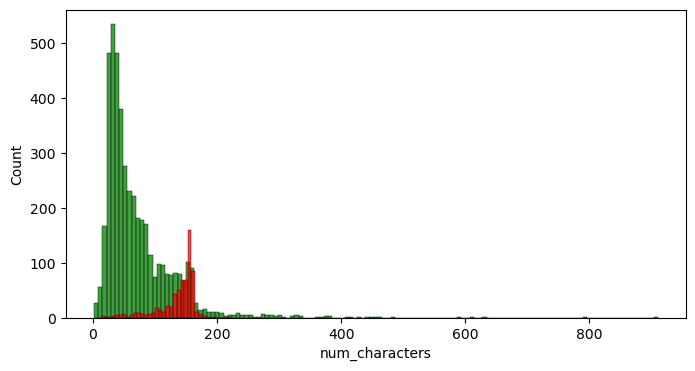

In [33]:
plt.figure(figsize=(8,4))
sns.histplot(df[df["target"] == 0]['num_characters'],color='green')
sns.histplot(df[df["target"] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

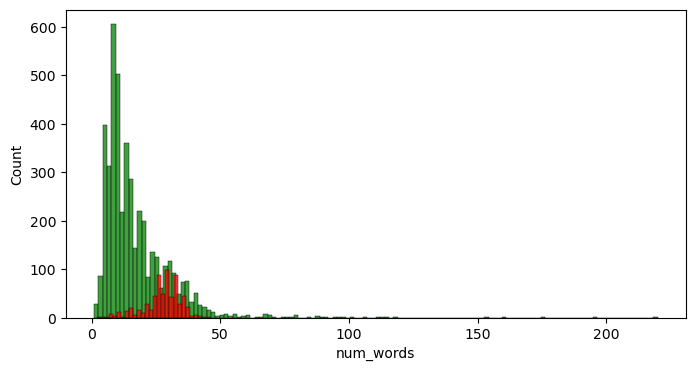

In [34]:
plt.figure(figsize=(8,4))
sns.histplot(df[df["target"] == 0]['num_words'],color='green')
sns.histplot(df[df["target"] == 1]['num_words'],color='red')

* By looking at the stats and chart, we can see that the number of characters, words, and sentences in ham text is less than that in spam text.
* Now, we look at this stat visually on a graph.

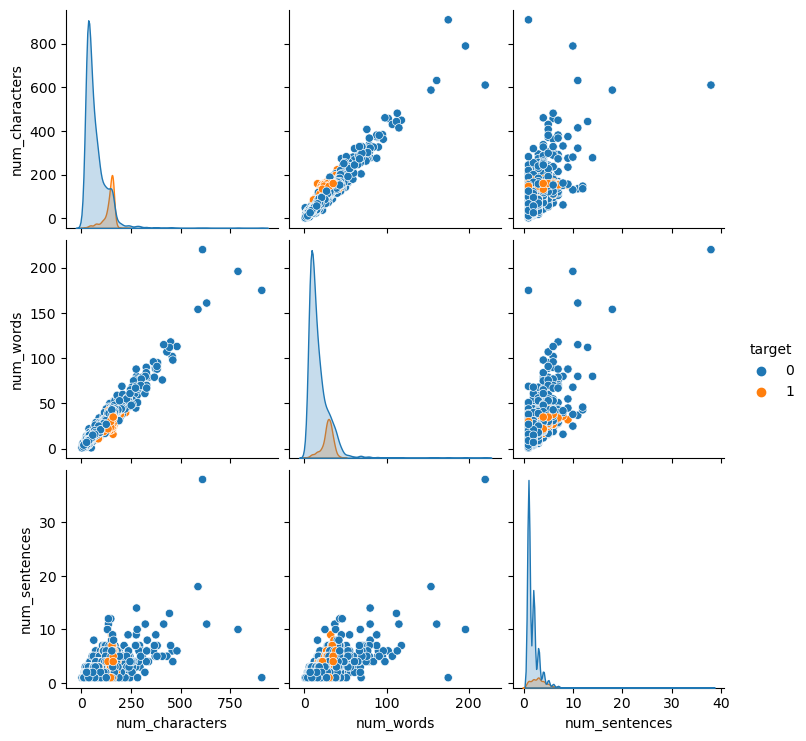

In [35]:
sns.pairplot(df,hue="target")
plt.show()

In [36]:
df.drop(columns="text",axis=1).corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.382785,0.263086,0.265459
num_characters,0.382785,1.000000,0.966063,0.624235
num_words,0.263086,0.966063,1.000000,0.680021
num_sentences,0.265459,0.624235,0.680021,1.000000


<Axes: >

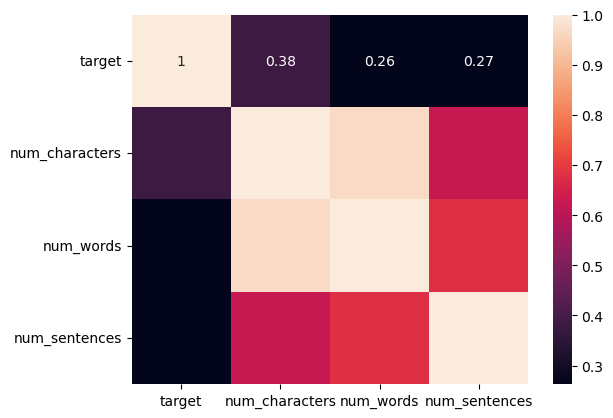

In [37]:
sns.heatmap(df.drop(columns="text",axis=1).corr(),annot=True)

## Data Preprocessing

In [38]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

In [39]:
ps = PorterStemmer()

In [40]:
def transfrom_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    v = []
    for i in text:
        if i.isalnum():
            v.append(i)
    x = []
    for i in v:
        if i not in stopwords.words('english') and i not in string.punctuation:
            x.append(i)
    z = []
    for i  in x:
        z.append(ps.stem(i))
        
    return " ".join(z)

In [41]:
df["transform_text"] = df["text"].apply(transfrom_text)

In [42]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from wordcloud import WordCloud

In [44]:
wc = WordCloud(width=700,height=500,min_font_size=12,background_color="white")

In [45]:
spam_wc = wc.generate(df[df["target"]==1]["transform_text"].str.cat(sep=" "))

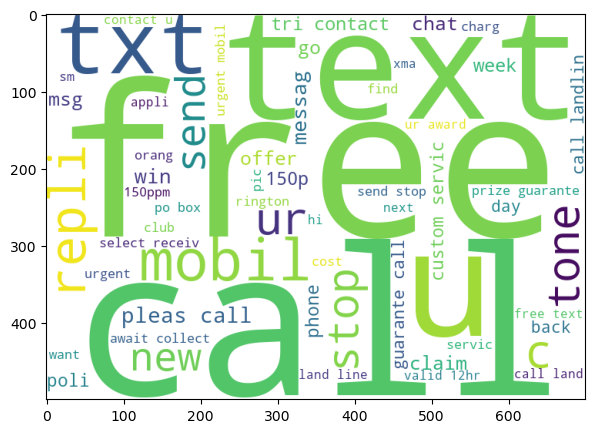

In [46]:
plt.figure(figsize=(7,5))
plt.imshow(spam_wc)

In [47]:
ham_wc = wc.generate(df[df["target"]==0]["transform_text"].str.cat(sep=" "))

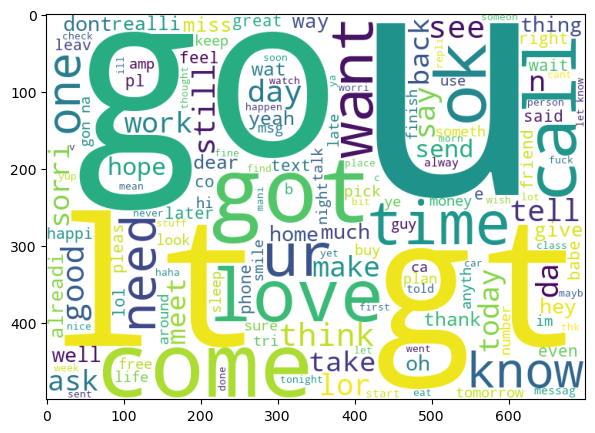

In [48]:
plt.figure(figsize=(7,5))
plt.imshow(ham_wc)

In [49]:
spam_word = []
for msg in df[df['target'] == 1]["transform_text"].tolist():
    for word in msg.split():
        spam_word.append(word)
spam_word

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

In [50]:
from collections import Counter

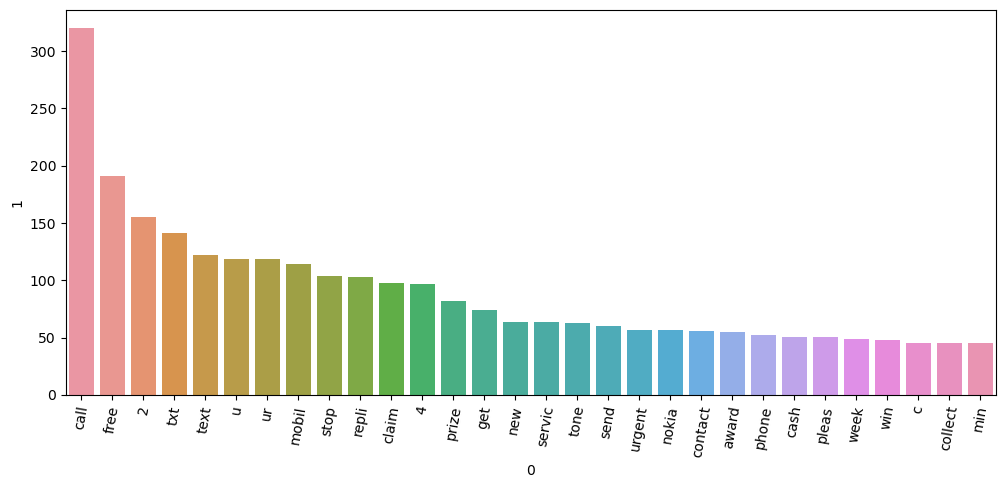

In [51]:
plt.figure(figsize=(12,5))
sns.barplot(x=pd.DataFrame(Counter(spam_word).most_common(30))[0],y=pd.DataFrame(Counter(spam_word).most_common(30))[1])
plt.xticks(rotation = 80)
plt.show()

In [52]:
ham_word = []
for msg in df[df['target'] == 0]["transform_text"].tolist():
    for word in msg.split():
        ham_word.append(word)
spam_word

['free',
 'entri',
 '2',
 'wkli',
 'comp',
 'win',
 'fa',
 'cup',
 'final',
 'tkt',
 '21st',
 'may',
 'text',
 'fa',
 '87121',
 'receiv',
 'entri',
 'question',
 'std',
 'txt',
 'rate',
 'c',
 'appli',
 '08452810075over18',
 'freemsg',
 'hey',
 'darl',
 '3',
 'week',
 'word',
 'back',
 'like',
 'fun',
 'still',
 'tb',
 'ok',
 'xxx',
 'std',
 'chg',
 'send',
 'rcv',
 'winner',
 'valu',
 'network',
 'custom',
 'select',
 'receivea',
 'prize',
 'reward',
 'claim',
 'call',
 'claim',
 'code',
 'kl341',
 'valid',
 '12',
 'hour',
 'mobil',
 '11',
 'month',
 'u',
 'r',
 'entitl',
 'updat',
 'latest',
 'colour',
 'mobil',
 'camera',
 'free',
 'call',
 'mobil',
 'updat',
 'co',
 'free',
 '08002986030',
 'six',
 'chanc',
 'win',
 'cash',
 '100',
 'pound',
 'txt',
 'csh11',
 'send',
 'cost',
 '6day',
 'tsandc',
 'appli',
 'repli',
 'hl',
 '4',
 'info',
 'urgent',
 '1',
 'week',
 'free',
 'membership',
 'prize',
 'jackpot',
 'txt',
 'word',
 'claim',
 '81010',
 'c',
 'lccltd',
 'pobox',
 '4403ldnw

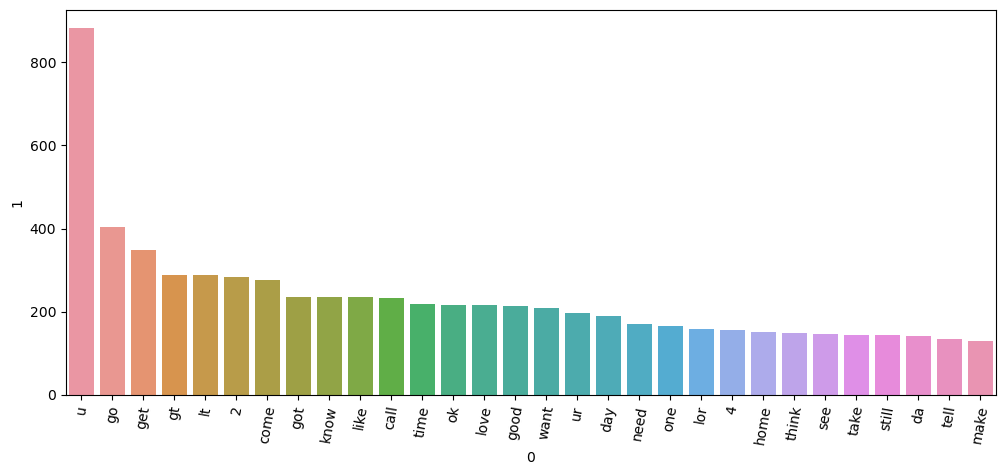

In [53]:
plt.figure(figsize=(12,5))
sns.barplot(x=pd.DataFrame(Counter(ham_word).most_common(30))[0],y=pd.DataFrame(Counter(ham_word).most_common(30))[1])
plt.xticks(rotation = 80)
plt.show()

## Model Building

In [134]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [135]:
cv = CountVectorizer()

In [136]:
tfidf = TfidfVectorizer(max_features=3000)

In [137]:
x = tfidf.fit_transform(df["transform_text"]).toarray()

In [138]:
# from sklearn.preprocessing import MinMaxScaler
# mm_scale =  MinMaxScaler()
# x = mm_scale.fit_transform(x)

In [139]:
y = df["target"]

In [140]:
from sklearn.model_selection import train_test_split

In [141]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=57)

In [142]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score

In [143]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [144]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print( "confusion matrix \n" ,confusion_matrix(y_test,y_pred1))
print("accuracy score : ",accuracy_score(y_test,y_pred1))
print("precision score: ",precision_score(y_test,y_pred1))

confusion matrix 
 [[789 117]
 [ 19 109]]
accuracy score :  0.8684719535783365
precision score:  0.4823008849557522


In [145]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print( "confusion matrix \n" ,confusion_matrix(y_test,y_pred2))
print("accuracy score : ",accuracy_score(y_test,y_pred2))
print("precision score: ",precision_score(y_test,y_pred2))

confusion matrix 
 [[905   1]
 [ 25 103]]
accuracy score :  0.9748549323017408
precision score:  0.9903846153846154


In [146]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print( "confusion matrix \n" ,confusion_matrix(y_test,y_pred3))
print("accuracy score : ",accuracy_score(y_test,y_pred3))
print("precision score: ",precision_score(y_test,y_pred3))

confusion matrix 
 [[902   4]
 [ 17 111]]
accuracy score :  0.9796905222437138
precision score:  0.9652173913043478


In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [115]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [116]:
classfs = {
    'LR': lrc, 
    'SVC' : svc,
    'NB': mnb, 
    'DT': dtc, 
    'KN' : knc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [117]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision
    

In [118]:
train_classifier(lrc, x_train,y_train,x_test,y_test)

(0.9584139264990329, 0.9775280898876404)

In [119]:
precision_scs = []
accuracy_scs = []

for key, value in classfs.items():
    precision , accuracy = train_classifier(value, x_train,y_train,x_test,y_test)

    print ("Model : ", key)
    print("precision score : ",precision)
    print("accuracy score : ",accuracy)
    print("-"*40)
    precision_scs.append(precision) 
    accuracy_scs.append(accuracy)
    

Model :  LR
precision score :  0.9584139264990329
accuracy score :  0.9775280898876404
----------------------------------------
Model :  SVC
precision score :  0.9758220502901354
accuracy score :  0.9724770642201835
----------------------------------------
Model :  NB
precision score :  0.9806576402321083
accuracy score :  0.9736842105263158
----------------------------------------
Model :  DT
precision score :  0.9294003868471954
accuracy score :  0.8160919540229885
----------------------------------------
Model :  KN
precision score :  0.9187620889748549
accuracy score :  1.0
----------------------------------------
Model :  RF
precision score :  0.9738878143133463
accuracy score :  0.9809523809523809
----------------------------------------
Model :  AdaBoost
precision score :  0.9709864603481625
accuracy score :  0.9711538461538461
----------------------------------------
Model :  BgC
precision score :  0.9555125725338491
accuracy score :  0.8306451612903226
------------------------

In [73]:
score_df = pd.DataFrame({"Model" : classfs.keys(), "Precision" : precision_scs,"Accuracy": accuracy_scs}).sort_values("Precision",ascending = False)

In [74]:
score_df

,Model,Precision,Accuracy
1,SVC,0.977756,0.981651
6,AdaBoost,0.977756,0.990654
5,RF,0.972921,0.990196
10,xgb,0.970986,0.945455
8,ETC,0.970019,0.970874
2,NB,0.963250,0.989130
7,BgC,0.956480,0.848739
0,LR,0.953578,0.934783
9,GBDT,0.948743,0.951807
3,DT,0.941006,0.852632


In [75]:
score_df1 = pd.melt(score_df, id_vars="Model")

In [76]:
score_df1

,Model,variable,value
0,SVC,Precision,0.977756
1,AdaBoost,Precision,0.977756
2,RF,Precision,0.972921
3,xgb,Precision,0.970986
4,ETC,Precision,0.970019
5,NB,Precision,0.963250
6,BgC,Precision,0.956480
7,LR,Precision,0.953578
8,GBDT,Precision,0.948743
9,DT,Precision,0.941006


In [77]:
score_df1.columns

Index(['Model', 'variable', 'value'], dtype='object')

<Axes: xlabel='Model', ylabel='value'>

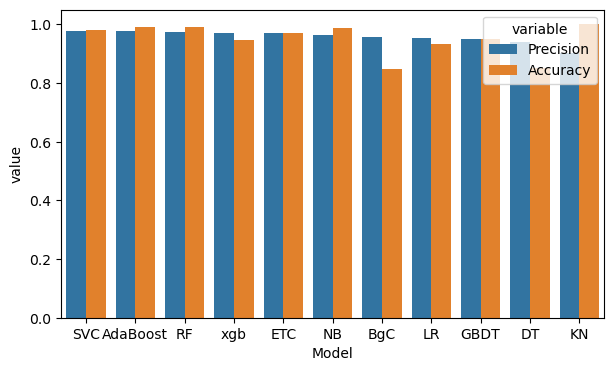

In [78]:
plt.figure(figsize=(7,4))
sns.barplot(x= "Model", y  = "value", hue = "variable" ,data = score_df1)

#### Model Improvement

In [96]:
temp_df1 = pd.DataFrame({"Model" : classfs.keys(), "Precision_max_ft" : precision_scs,"Accuracy_max_ft": accuracy_scs}).sort_values("Precision_max_ft",ascending = False)

In [97]:
temp_df1

,Model,Precision_max_ft,Accuracy_max_ft
1,SVC,0.977756,0.981651
2,NB,0.974855,0.990385
5,RF,0.973888,0.980952
10,xgb,0.973888,0.963303
8,ETC,0.972921,0.971698
6,AdaBoost,0.970986,0.971154
0,LR,0.959381,0.957447
7,BgC,0.955513,0.830645
9,GBDT,0.945841,0.950000
3,DT,0.931335,0.827586


In [98]:
new_df = score_df.merge(temp_df1, on = "Model")

In [102]:
new_df.sort_values("Precision_max_ft", ascending = False)

,Model,Precision,Accuracy,Precision_max_ft,Accuracy_max_ft
0,SVC,0.977756,0.981651,0.977756,0.981651
5,NB,0.963250,0.989130,0.974855,0.990385
2,RF,0.972921,0.990196,0.973888,0.980952
3,xgb,0.970986,0.945455,0.973888,0.963303
4,ETC,0.970019,0.970874,0.972921,0.971698
1,AdaBoost,0.977756,0.990654,0.970986,0.971154
7,LR,0.953578,0.934783,0.959381,0.957447
6,BgC,0.956480,0.848739,0.955513,0.830645
8,GBDT,0.948743,0.951807,0.945841,0.950000
9,DT,0.941006,0.852632,0.931335,0.827586


In [120]:
temp_df2 = pd.DataFrame({"Model" : classfs.keys(), "Precision_scaled" : precision_scs,"Accuracy_scaled": accuracy_scs}).sort_values("Precision_scaled",ascending = False)

In [121]:
new_scaled_df = new_df.merge(temp_df2,on = "Model")

In [122]:
new_scaled_df

,Model,Precision,Accuracy,Precision_max_ft,Accuracy_max_ft,Precision_scaled,Accuracy_scaled
0,SVC,0.977756,0.981651,0.977756,0.981651,0.975822,0.972477
1,AdaBoost,0.977756,0.990654,0.970986,0.971154,0.970986,0.971154
2,RF,0.972921,0.990196,0.973888,0.980952,0.973888,0.980952
3,xgb,0.970986,0.945455,0.973888,0.963303,0.973888,0.963303
4,ETC,0.970019,0.970874,0.972921,0.971698,0.972921,0.971698
5,NB,0.963250,0.989130,0.974855,0.990385,0.980658,0.973684
6,BgC,0.956480,0.848739,0.955513,0.830645,0.955513,0.830645
7,LR,0.953578,0.934783,0.959381,0.957447,0.958414,0.977528
8,GBDT,0.948743,0.951807,0.945841,0.950000,0.945841,0.950000
9,DT,0.941006,0.852632,0.931335,0.827586,0.929400,0.816092


#### Voting Classifier

In [125]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

In [126]:
from sklearn.ensemble import VotingClassifier

In [127]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [128]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [129]:
y_pred = voting.predict(x_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("Precision : ",precision_score(y_test,y_pred))

Accuracy :  0.9835589941972921
Precision :  0.9911504424778761


### Make pickle file

In [130]:
import pickle

In [132]:
pickle.dump(tfidf,open("vectiruzer.pkl","wb"))
pickle.dump(mnb, open("model.pkl","wb"))